# **Handwritten Digit Multiclass Classification**

###### **Import Required Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import random

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

###### **Load the Digits Dataset**

In [ ]:
digits = load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

###### **Dataset Overview**

In [ ]:
print(f"data shape : {digits.data.shape}")
print(f"images shape : {digits.images.shape}")
print(f"target shape : {digits.target.shape}")
print(f"target_names shape : {digits.target_names.shape}")

data shape : (1797, 64)
images shape : (1797, 8, 8)
target shape : (1797,)
target_names shape : (10,)


In [ ]:
def display_digits(index_value = None):
    if(index_value != None) :
      idx = index_value
    else :
      idx = random.randint(0, digits.data.shape[0] - 1)

    fig, ax = plt.subplots(figsize=(2, 4))
    ax.imshow(digits.images[idx], cmap='gray')
    ax.set_xlabel(f"Digit : {digits.target[idx]}")
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()


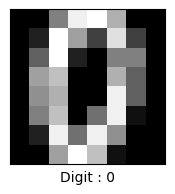

In [ ]:
display_digits()

###### **Train-Test Split the Dataset**

In [ ]:
X_train, X_test, y_train, y_test, train_idx, test_idx = train_test_split(
    digits.data,
    digits.target,
    range(len(digits.data)),
    test_size=0.2,
    random_state=42
)

###### **Train Logistic Regression Models**

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

###### **Model Accuracy**

In [ ]:
model.score(X_test,y_test)

0.9694444444444444

###### **Model Predictions**

In [ ]:
y_predicted = model.predict(X_test)

###### **Prediction DataFrame**

In [ ]:
prediction_dataframe = pd.DataFrame({
    'Original_Index': test_idx,
    'Actual': y_test,
    'Predicted': y_predicted
})


In [ ]:
prediction_dataframe

,Original_Index,Actual,Predicted
0,1245,6,6
1,220,9,9
2,1518,3,3
3,438,7,7
4,1270,2,2
...,...,...,...
355,1731,4,4
356,1630,3,3
357,1037,8,8
358,965,3,3


###### **Visualize a Random Prediction**

In [ ]:
def prediction():
    row = random.randint(0, len(prediction_dataframe) - 1)
    original_idx = prediction_dataframe.loc[row, 'Original_Index']

    fig, ax = plt.subplots(figsize=(2, 4))
    print(f"idx = {original_idx}")
    ax.imshow(digits.images[original_idx], cmap='gray')

    ax.set_xlabel(
        f"Predicted: {prediction_dataframe.loc[row, 'Predicted']}\n"
        f"Actual: {prediction_dataframe.loc[row, 'Actual']} \n"
        f"Digit : {digits.target[original_idx]}"
    )

    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()


idx = 832


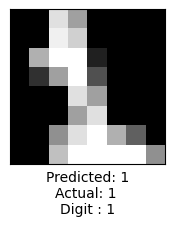

In [ ]:
prediction()

###### **Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test,y_predicted)

Text(50.722222222222214, 0.5, 'Truth')

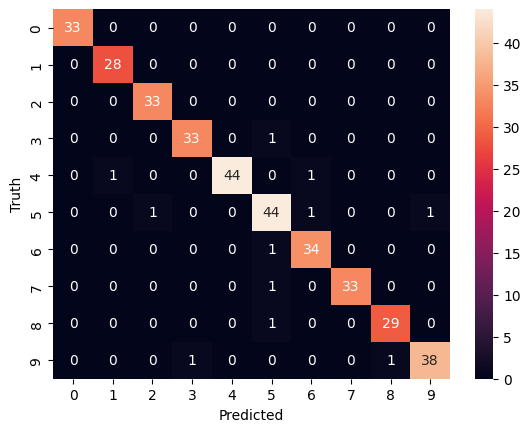

In [ ]:
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
